In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  
%matplotlib inline
import statistics

## Business Problem 1

## Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)


## a-  Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [3]:
Loan = pd.read_csv('C:/Users/rajsh/OneDrive/Desktop/Python_5th/Basic Statistics - Hypothesis Testing/LoansData.csv')
Loan.head(1)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year


In [4]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [5]:
Loan['Interest.Rate'] = Loan['Interest.Rate'].str.rstrip('%').astype(float)/100

In [6]:
Loan.head(1)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,0.089,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year


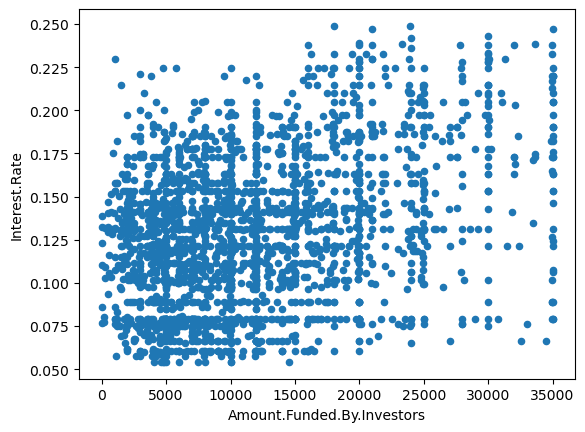

In [7]:
Loan.plot(kind = 'scatter' , x= 'Amount.Funded.By.Investors', y = 'Interest.Rate')
plt.show()

In [8]:
Loan.loc[:, ['Amount.Funded.By.Investors', 'Interest.Rate']].corr()

,Amount.Funded.By.Investors,Interest.Rate
Amount.Funded.By.Investors,1.000000,0.337454
Interest.Rate,0.337454,1.000000


In [9]:
Loan = Loan.rename(columns={'Amount.Funded.By.Investors': 'Amount_Funded_By_Investors', 'Interest.Rate': 'Interest_Rate' , 'Loan.Length':'Loan_Length' , 'Loan.Purpose' : 'Loan_Purpose',
                           'Home.Ownership' : 'Home_Ownership','FICO.Range' : 'FICO_Range'})

In [10]:
Loan.head(1)
Loan.dropna(inplace = True)

In [11]:
# Ho: No relationship
# Ha: Association
# CI: 95%, p: 0.05

# perform the test 
stats.pearsonr( Loan.Amount_Funded_By_Investors, Loan.Interest_Rate)

#conclusion
#There is a relationship b/w Amount_Funded_By_Investors and Interest_Rate
# interest rate is vary for different loan amount

PearsonRResult(statistic=0.33159553110364703, pvalue=5.06425695047331e-63)

## b- Loan length is directly effecting intrest rate.

In [12]:
var_name = 'Interest_Rate'
Group_1 = Loan.loc[Loan.Loan_Length == '36 months', var_name]
Group_2 = Loan.loc[Loan.Loan_Length == '60 months', var_name]   ##independent sampple ttest

#display the mean usages
print('mean spend of Group_1:', Group_1.mean())
print('mean spend of Group_2:', Group_2.mean())

mean spend of Group_1: 0.12130074626865694
mean spend of Group_2: 0.1637873370577283


In [13]:
# H0: u1 = u2
# Ha: u1 <> u2
# CI: 99%, p: 0.01

# perform the test
stats.ttest_ind( Group_1, Group_2 )

#conclusion
#Loan length is effecting intrest rate

Ttest_indResult(statistic=-23.057793284827003, pvalue=1.7938010673411905e-106)

## c-Inrest rate varies for different purpose of loans

In [14]:
Loan.columns

Index(['Amount.Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home_Ownership', 'Monthly.Income', 'FICO_Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [15]:
Loan.Loan_Purpose.nunique()

14

In [16]:
Loan.Loan_Purpose.value_counts()  ##Anova

debt_consolidation    1262
credit_card            430
other                  189
home_improvement       147
major_purchase         100
small_business          83
car                     50
wedding                 37
moving                  29
medical                 28
vacation                20
house                   20
educational             14
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [17]:
# declare the variable for which we want to do the analysis
var = 'Interest_Rate'

# filter the data based on Loan_Purpose
s1 = Loan.loc[ Loan.Loan_Purpose == 'debt_consolidation' , var ]
s2 = Loan.loc[ Loan.Loan_Purpose == 'credit_card' , var ]
s3 = Loan.loc[ Loan.Loan_Purpose == 'home_improvement' , var ]
s4 = Loan.loc[ Loan.Loan_Purpose == 'major_purchase' , var ]
s5 = Loan.loc[ Loan.Loan_Purpose == 'small_business' , var ]
s6 = Loan.loc[ Loan.Loan_Purpose == 'car' , var ]
s7 = Loan.loc[ Loan.Loan_Purpose == 'moving' , var ]
s8 = Loan.loc[ Loan.Loan_Purpose == 'wedding' , var ]
s9 = Loan.loc[ Loan.Loan_Purpose == 'medical' , var ]
s10 = Loan.loc[ Loan.Loan_Purpose == 'vacation' , var ]
s11 = Loan.loc[ Loan.Loan_Purpose == 'house' , var ]
s12 = Loan.loc[ Loan.Loan_Purpose == 'educational' , var ]
s13 = Loan.loc[ Loan.Loan_Purpose == 'renewable_energy' , var ]
s14 = Loan.loc[ Loan.Loan_Purpose == 'other' , var ]

#display mean of the sample
print( 'mean of s1: ', s1.mean() ,'| mean of s2: ', s2.mean(), '| mean of s3: ', s3.mean() , '| mean of s4: ', s4.mean(), '| mean of s5: ', s5.mean(), '| mean of s6: ', s6.mean() , '|mean of s7: ', s7.mean(),
      '| mean of s8: ', s8.mean(), '| mean of s9: ', s9.mean() , '|mean of s10: ', s10.mean(), '| mean of s11: ', s11.mean(), '| mean of s12: ', s12.mean() ,'|mean of s13: ', s13.mean(), '| mean of s14: ', s14.mean() )

mean of s1:  0.13597773375594308 | mean of s2:  0.1302555813953491 | mean of s3:  0.11612040816326537 | mean of s4:  0.10827000000000003 | mean of s5:  0.12892409638554217 | mean of s6:  0.11113000000000003 |mean of s7:  0.13621034482758623 | mean of s8:  0.11958918918918918 | mean of s9:  0.11763214285714285 |mean of s10:  0.12262999999999999 | mean of s11:  0.13448 | mean of s12:  0.10874285714285715 |mean of s13:  0.098775 | mean of s14:  0.13237037037037044


In [18]:
# Ho: All the samples are from SAME population, means are EQUAL
# Ha: Samples are from DIFFERENT population, means are UNEQUAL
# CI: 99%, p: 0.01

# perform the test
stats.f_oneway( s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14)

# conclusion
# Interest rate vary for different purpose of loan

F_onewayResult(statistic=7.330838185919652, pvalue=2.7646672581411367e-14)

##  d-There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [19]:
#chi-square test
# get the ob_freq_table from the dataset
obs_freq = pd.crosstab( Loan.Home_Ownership, Loan.FICO_Range )
obs_freq

FICO_Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home_Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,40,52,66,78,55,58,...,19,12,15,7,7,6,5,5,0,1
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,14,17,13,10,9,10,...,3,1,1,1,3,2,1,0,1,0
RENT,4,2,0,3,64,69,87,72,91,60,...,4,4,4,5,2,3,2,0,0,0


In [20]:
# Ho: No relationship
# Ha: Association
# CI: 99%, p: 0.01

# perform the test 
stats.chi2_contingency( obs_freq )

# output: At 99% CI we can reject the H0
# business conclusion
# people will owning hom will have high FICO score

(269.7881202757334,
 3.0875472813837764e-15,
 111,
 array([[2.29796933e+00, 1.37878160e+00, 4.59593867e-01, 1.83837547e+00,
         5.42320763e+01, 6.34239536e+01, 7.67521757e+01, 7.39946125e+01,
         7.21562370e+01, 5.88280149e+01, 6.20451720e+01, 6.71007045e+01,
         5.69896395e+01, 6.02067965e+01, 4.91765437e+01, 4.22826357e+01,
         4.96361376e+01, 4.18230419e+01, 4.32018235e+01, 2.98736013e+01,
         2.29796933e+01, 2.48180688e+01, 2.75756320e+01, 2.02221301e+01,
         2.06817240e+01, 1.47070037e+01, 7.81309573e+00, 1.01110651e+01,
         1.19494405e+01, 7.81309573e+00, 9.19187733e+00, 5.97472027e+00,
         5.51512640e+00, 5.05553253e+00, 3.67675093e+00, 2.29796933e+00,
         4.59593867e-01, 4.59593867e-01],
        [1.03605470e-02, 6.21632822e-03, 2.07210941e-03, 8.28843763e-03,
         2.44508910e-01, 2.85951098e-01, 3.46042271e-01, 3.33609615e-01,
         3.25321177e-01, 2.65230004e-01, 2.79734770e-01, 3.02527973e-01,
         2.56941567e-01, 2.7144

## Business Problem 2

## We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.


In [21]:
Price_Quotes = pd.read_csv('C:/Users/rajsh/OneDrive/Desktop/Python_5th/Basic Statistics - Hypothesis Testing/Price_Quotes.csv')
Price_Quotes.head(1)

,Order_Number,Barry_Price,Mary_Price
0,1,126,114


In [22]:
# declare the post campaighn analysis variable for consideration
var_name = 'Mary_Price'

# print the means
print('Barry_Price mean:', Price_Quotes.Barry_Price.mean())
print('Mary_Price mean:', Price_Quotes.loc[:, var_name].mean())



Barry_Price mean: 124.33333333333333
Mary_Price mean: 114.75


In [23]:
# H0: u1 = u2
# Ha: u1 <> u2
# CI: 99%, p: 0.01


# perform the test
stats.ttest_rel( Price_Quotes.Barry_Price, Price_Quotes.loc[:, var_name])

# business conclusion
#fail to reject the H0, Barry and Mary both are given the similar kind of pricing

Ttest_relResult(statistic=2.5213765108923494, pvalue=0.02840588045242053)

## Business Problem 3

##  Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [24]:
Treatment_Facility = pd.read_csv("C:/Users/rajsh/OneDrive/Desktop/Python_5th/Basic Statistics - Hypothesis Testing/Treatment_Facility.csv")
Treatment_Facility.head(1)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0,24.390244,42.682927


In [25]:
var_name = 'VAR5'
Prior = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Prior' , var_name]
Post = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Post' , var_name]

# display the mean usages
print('mean spend of Prior:', Prior.mean() )
print('mean spend of Post:', Post.mean() )

mean spend of Prior: 53.887906321846145
mean spend of Post: 23.34971927988571


In [26]:
# H0: u1 = u2
# Ha: u1 <> u2
# CI: 99%, p: 0.01

# perform the test
stats.ttest_ind( Prior, Post )

# business conclusion
# incident rate prior and post are same

Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)

## Business Problem 4

##  We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

In [27]:
Priority_Assessment = pd.read_csv("C:/Users/rajsh/OneDrive/Desktop/Python_5th/Basic Statistics - Hypothesis Testing/Priority_Assessment.csv")
Priority_Assessment.head(1)

,Days,Priority
0,3.3,High


In [28]:
#Anova
Priority_Assessment.Priority.nunique()

3

In [29]:
Priority_Assessment.Priority.value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [30]:
# declare the variable for which we want to do the analysis
var = 'Days'

# filter the data based on Priority
s1 =Priority_Assessment.loc[ Priority_Assessment.Priority == 'High', var ]
s2 =Priority_Assessment.loc[ Priority_Assessment.Priority == 'Medium', var ]
s3 =Priority_Assessment.loc[ Priority_Assessment.Priority == 'Low', var ]

# display the mean of the three sample
print( 'mean of s1: ', s1.mean(), '| mean of s2: ', s2.mean(), '| mean of s3: ', s3.mean() )

mean of s1:  3.023619631901845 | mean of s2:  2.5000000000000004 | mean of s3:  4.228358208955225


In [31]:
# Ho: All the samples are from SAME population, means are EQUAL
# Ha: Samples are from DIFFERENT population, means are UNEQUAL
# CI: 99%, p: 0.01

# perform the test
stats.f_oneway( s1, s2, s3 )

# conclusion
# high priority jobs take less time to low but more time to medium

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

## Business Problem 5

## Use the survey results to addressthe following questions

## a- What is the overall level of customer satisfaction?

In [32]:
Films = pd.read_csv("C:/Users/rajsh/OneDrive/Desktop/Python_5th/Basic Statistics - Hypothesis Testing/Films.csv")
Films.head(1)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5


In [33]:
#CI: 95% , mean-1.96*SE to mean+1.96*SE

In [34]:
print('Overall mean:', Films.Overall.mean())

Overall mean: 1.6189024390243902


In [35]:
print('standard deviation:', np.std(Films.Overall))

standard deviation: 0.6882347623034115


In [36]:
from scipy.stats import sem
import math

In [37]:
np.std(Films.Overall)/(math.sqrt(330))

0.03788607675982049

In [38]:
Films.Overall.mean()-1.96*np.std(Films.Overall)/(math.sqrt(330)) , Films.Overall.mean()+1.96*np.std(Films.Overall)/(math.sqrt(330))

(1.544645728575142, 1.6931591494736384)

In [39]:
#with 95% confidence , people are given satisfication score is some where between 1.54 to 1.7

## b-  What factors are linked to satisfaction?

In [40]:
Films.head(1)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5


In [41]:
Films.dropna(how = 'all').head(1)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5


In [42]:
#Anova test
Films.Age.nunique()

4

In [43]:
Films.Age.value_counts()

2.0    175
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [44]:
var = 'Overall'

# filter the data based on segments
s1 = Films.loc[ Films.Age == 1, var]
s2 = Films.loc[ Films.Age == 2, var]
s3 = Films.loc[ Films.Age == 3, var]
s4 = Films.loc[ Films.Age == 4, var]

# display the mean of the three sample
print( 'mean of s1: ', s1.mean(), '| mean of s2: ', s2.mean(), '| mean of s3: ', s3.mean() , '| mean of s4:' , s4.mean() )


mean of s1:  1.5384615384615385 | mean of s2:  1.6820809248554913 | mean of s3:  1.547008547008547 | mean of s4: 1.7


In [45]:
# perform the test
stats.f_oneway( s1, s2, s3 , s4 )

F_onewayResult(statistic=nan, pvalue=nan)

In [46]:
# relation b/w gender and overall

# take the two samples
var_name = 'Overall'
male = Films.loc[ Films.Gender == 'Male', var_name ]
female =Films.loc[ Films.Gender == 'Female', var_name ]

# display the mean usages
print('mean spend of male:', male.mean() )
print('mean spend of female:', female.mean() )

mean spend of male: 2.076923076923077
mean spend of female: 1.368421052631579


In [47]:
# H0: u1 = u2
# Ha: u1 <> u2
# CI: 99%, p: 0.01

# perform the test
stats.ttest_ind( male, female )

#

Ttest_indResult(statistic=2.5888027174359816, pvalue=0.01471174342681416)

In [48]:
# relation b/w marital status and overall

# take the two samples
var_name = 'Overall'
married = Films.loc[ Films.Marital_Status == 'Married', var_name ]
single = Films.loc[ Films.Gender == 'Single', var_name ]

# display the mean usages
print('mean spend of married:', married.mean() )
print('mean spend of Single:', single.mean() )

mean spend of married: 1.6666666666666667
mean spend of Single: nan


In [49]:
# perform the test
stats.ttest_ind( married, single )

Ttest_indResult(statistic=nan, pvalue=nan)

In [50]:
#anova test
Films.Income.value_counts()

1.0    142
3.0     90
2.0     82
Name: Income, dtype: int64

In [51]:
var = 'Overall'

# filter the data based on segments
s1 = Films.loc[ Films.Income == 1, var]
s2 = Films.loc[ Films.Income == 2, var]
s3 = Films.loc[ Films.Income == 3, var]

# display the mean of the three sample
print( 'mean of s1: ', s1.mean(), '| mean of s2: ', s2.mean(), '| mean of s3: ', s3.mean() )

mean of s1:  1.624113475177305 | mean of s2:  1.5853658536585367 | mean of s3:  1.6222222222222222


In [52]:
# perform the test
stats.f_oneway( s1, s2, s3 , s4 )

F_onewayResult(statistic=nan, pvalue=nan)

In [53]:
#anova test
Films.Hear_About.value_counts()

5      226
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [54]:
var = 'Overall'

# filter the data based on segments
s1 = Films.loc[ Films.Hear_About == 1, var]
s2 = Films.loc[ Films.Hear_About == 2, var]
s3 = Films.loc[ Films.Hear_About == 3, var]
s4 = Films.loc[ Films.Hear_About == 4, var]
s5 = Films.loc[ Films.Hear_About == 5, var]
s6 = Films.loc[ (Films.Hear_About == 2)  & (Films.Hear_About == 5)  ,var]
s7 = Films.loc[ (Films.Hear_About == 3)  & (Films.Hear_About == 4)  ,var]
s8 = Films.loc[ (Films.Hear_About == 4)  & (Films.Hear_About == 5)  ,var]
s9 = Films.loc[ (Films.Hear_About == 1)  & (Films.Hear_About == 5)  ,var]
s10 = Films.loc[ (Films.Hear_About == 5)  & (Films.Hear_About == 4)  ,var]
s11 = Films.loc[ (Films.Hear_About == 3)  & (Films.Hear_About == 5)  ,var]

In [55]:
#display mean of the sample
print( 'mean of s1: ', s1.mean() ,'| mean of s2: ', s2.mean(), '| mean of s3: ', s3.mean() , '| mean of s4: ', s4.mean(), '| mean of s5: ', s5.mean(), '| mean of s6: ', s6.mean() , '|mean of s7: ', s7.mean(),
      '| mean of s8: ', s8.mean(), '| mean of s9: ', s9.mean() , '|mean of s10: ', s10.mean(), '| mean of s11: ', s11.mean())

mean of s1:  nan | mean of s2:  nan | mean of s3:  nan | mean of s4:  nan | mean of s5:  nan | mean of s6:  nan |mean of s7:  nan | mean of s8:  nan | mean of s9:  nan |mean of s10:  nan | mean of s11:  nan


In [56]:
Films.head(1)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5


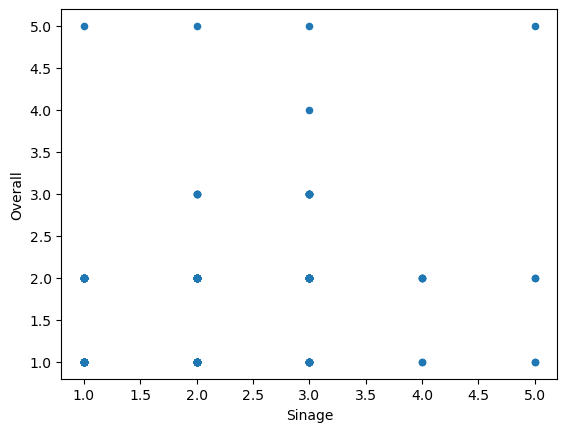

In [57]:
Films.plot(kind = 'scatter' , x= 'Sinage', y = 'Overall')
plt.show()

#no relation b/w sinage and overall

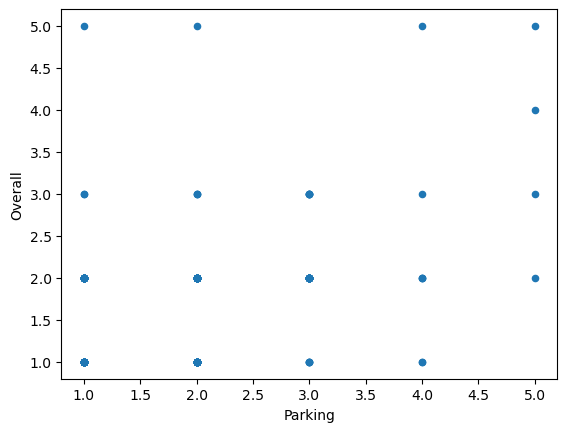

In [58]:
Films.plot(kind = 'scatter' , x= 'Parking', y = 'Overall')
plt.show()
#no relation b/w Parking and overall

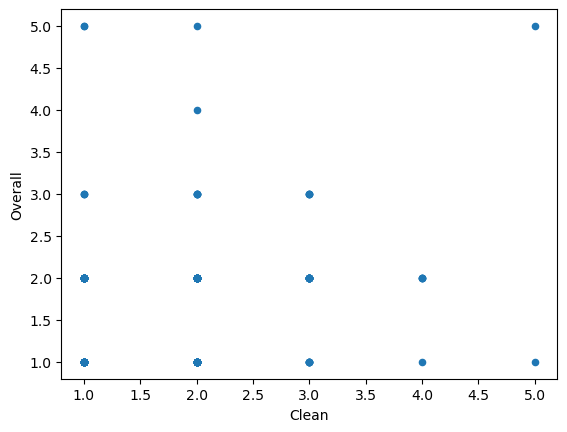

In [59]:
Films.plot(kind = 'scatter' , x= 'Clean', y = 'Overall')
plt.show()
#no relation b/w Clean and overall

## c-  What is the demographic profile of Film on the Rocks patrons?

In [60]:
Films.head(1)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5


In [61]:
Films['Movie'].describe()

count             330
unique              3
top       Willy Wonka
freq              161
Name: Movie, dtype: object

In [62]:
Films[['Movie', 'Gender' , 'Marital_Status','Sinage','Parking','Clean','Overall','Age','Income','Hear_About']].describe(include= 'all')

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
count,330,330,328,328.000000,328.000000,327.000000,328.000000,328.000000,314.000000,323
unique,3,4,5,NaN,NaN,NaN,NaN,NaN,NaN,11
top,Willy Wonka,2,2,NaN,NaN,NaN,NaN,NaN,NaN,5
freq,161,194,208,NaN,NaN,NaN,NaN,NaN,NaN,226
mean,NaN,NaN,NaN,1.884146,1.756098,1.681957,1.618902,2.338415,1.834395,NaN
std,NaN,NaN,NaN,0.830603,0.798484,0.728313,0.689286,0.666902,0.844808,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,NaN
50%,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN
75%,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,NaN


In [63]:
#missing value treatment
#Films = Films.apply( lambda x: x.fillna( x.mean() ) )

## d- In what media outlet(s) should the film series be advertised?

In [64]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [65]:
#chi square test
# get the ob_freq_table from the dataset
obs_freq = pd.crosstab( Films.Movie , Films.Hear_About)
obs_freq

Hear_About,1,"1,5",2,"2,5",3,"3,4","3,5",4,"4,5",5,"5,4"
Movie,,,,,,,,,,,
Ferris Buellers Day Off,13,1,4,1,4,0,0,17,1,94,0
Old School,1,0,4,0,1,1,0,1,0,24,0
Willy Wonka,8,0,4,1,9,1,1,23,0,108,1


In [86]:
Films.Hear_About.value_counts()

5      226
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [103]:
per = (Films['Hear_About'].value_counts()/len(Films))*100
per

5      68.484848
4      12.424242
1       6.666667
3       4.242424
2       3.636364
2,5     0.606061
3,4     0.606061
4,5     0.303030
1,5     0.303030
5,4     0.303030
3,5     0.303030
Name: Hear_About, dtype: float64

In [88]:
#on the basis of value count and per we can say that film series should be advertised by word of mouth